In [8]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

#from matplotlib import rcParams
#rcParams['figure.figsize'] = 16, 12
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Tahoma']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load MEG Data for Testing (Using omegamappin-library)

In [ ]:
import sys
sys.path.append('/Users/tom/Documents/GitCode/omegamappin/')

from om.core.db import OMDB
from om.core.io import load_meg_psds

In [ ]:
# Get database and path details from OMDB class
db = OMDB()
# Check available subject numbers for PSD files
sub_nums = db.check_dat_files('PSD')

In [ ]:
# Get PSD files
psd_files, _ = db.check_dat_files('PSD', verbose=False)

In [ ]:
# Load MEG Data
subj = 352132
psd, freqs = load_meg_psds('HCP', db.psd_path, subj)

In [ ]:
# Set which PSD to run
# 4799
cur_psd = np.log10(psd[4799, :])
#cur_psd = np.log10(psd[6395, :])

### Or: Load MEG Data from file

In [ ]:
#dat = np.load('meg_dat.npy')
#freqs = dat[0]
#psd = dat[1]

## Load EEG data for testing

In [ ]:
# Load
dat = np.load('data-for-tom.npy').item()

# Get freqs & unembed from being an array of arrays
freqs = dat['f']
freqs = np.array([f[0] for f in freqs])

In [ ]:
# Grab psd of interest
cur_psd = np.log10(dat[0][20]['eyeso'])

In [ ]:
### Load other EEG data

### Load other EEG data

In [ ]:
def data_eeg(filename, freq_range):

    psd_array = np.load(filename)
    psd_array = np.log10(psd_array)

    range_size = np.size(range(freq_range[1]))-np.size(range(freq_range[0]))
    xf = np.linspace(freq_range[0], freq_range[1], range_size)
    
    psd_array = psd_array.T
    
    return psd_array, xf

In [ ]:
file_path = '/Users/tom/Documents/GitCode/fooof/data/eeg/'
psd, freqs = data_eeg(file_path + '44.npy', [0, 50])

In [ ]:
cur_psd = psd[:, 5]

## RUN FOOOF

In [9]:
# Custom Code Import
%autoreload 2
from fooof import FOOOF

In [ ]:
ff = FOOOF(bandwidth_limits=[0.5,8])
f_range = [3, 40]

In [ ]:
ff.model(freqs, cur_psd, f_range)

In [ ]:
plt.plot(ff.freqs, ff._oscillation_fit)

In [ ]:
ff._gaussian_params

In [ ]:
psd[0, :].shape

In [ ]:
freqs.shape

In [ ]:
# PSD
for i in range(0, psd.shape[1]):
    print(i)
    ff.fit(freqs, psd[:, i], f_range)


In [ ]:
ff.plot()

In [ ]:
len(psd)

In [ ]:
for i in range(0, 1000):#psd.shape[0]):
    print(i)
    ff.fit(freqs, np.log10(psd[i, :]), f_range)

In [ ]:
ff.plot()

In [ ]:
# For setting centering size based on consol width:
#import os
#print("hello world".center(os.get_terminal_size().columns))

In [ ]:
ff.oscillation_params

In [ ]:
from fooof.funcs import gaussian_function

In [ ]:
x = np.arange(0, 20, 0.1)
y = gaussian_function(x, ctr, amp, wid)

In [ ]:
plt.plot(y)

In [ ]:
x = np.arange(0, 20, 0.1)

y1 = np.zeros_like(x)
y2 = np.zeros_like(x)
y3 = np.zeros_like(x)

ctr = 10
amp = 1
wid = 2

In [ ]:
y1 = y1 + amp * np.exp(-((x - ctr) / wid)**2)

y2 = y2 + amp * np.exp(-(x - ctr)**2 / (wid)**2)

y3 = y3 + amp * np.exp(-(x - ctr)**2 / (2 * wid**2))

In [ ]:
print(np.all(y1 == y2))
print(np.all(y2 == y3))

In [ ]:
plt.plot(y1)

In [ ]:
plt.plot(y2)

In [ ]:
plt.plot(y3)

In [ ]:
(2 * np.sqrt(2 * np.log(2)))

In [ ]:
le_ind = ri_ind = None

In [ ]:
print(le_ind)
print(ri_ind)

In [ ]:
le_ind = 1
ri_ind = 2

In [ ]:
it = np.arange(10)

In [ ]:
next(x for x in it if x > 3)

In [10]:
from fooof.funcs import gaussian_function, linear_function, quadratic_function
from fooof.tests.test_fooof import mk_fake_data

In [11]:
xs = np.arange(3, 40, 0.5)
bgp = [-20, -0.8, 3e-15]
oscs = [[10, 0.5, 2],
        [20, 0.3, 4]]

In [12]:
xs, ys = mk_fake_data(xs, bgp, [it for osc in oscs for it in osc])

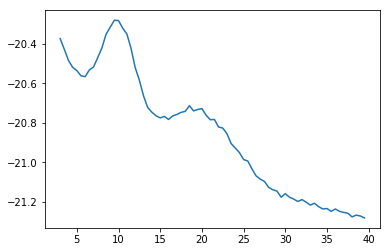

In [13]:
plt.plot(xs, ys)


                                          FOOOF - PSD MODEL                                          

                     The input PSD was modelled in the frequency range 3-40 Hz                      
                                 Frequency Resolution is 0.50 Hz 
                                  
                                      Background Parameters:                                        
                                    -19.9530, -0.8220, 3.67e-17                                     

                                      2 oscillations were found:                                     
                                 CF:  10.10, Amp:  0.479, BW:  1.87                                 
                                 CF:  19.93, Amp:  0.275, BW:  3.74                                 

                                R-squared error of model fit is 0.0129                               



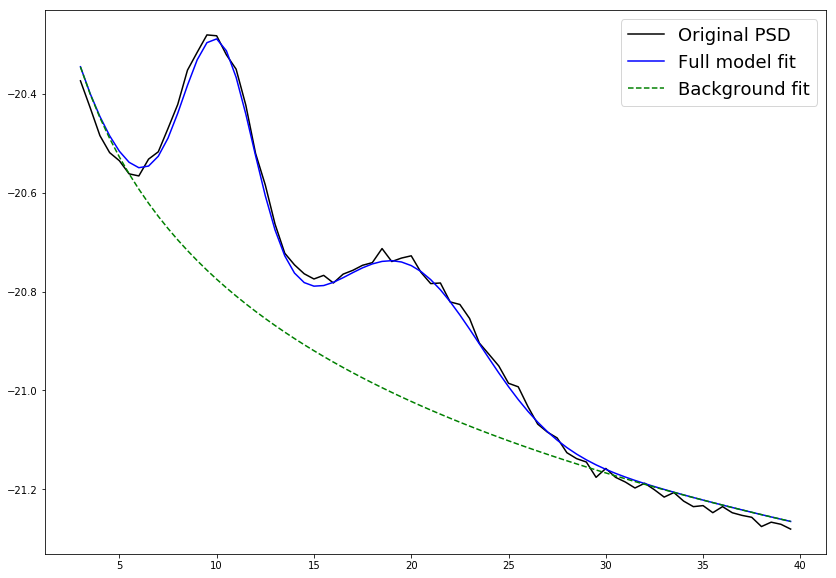

In [14]:
ff = FOOOF()
ff.model(xs, ys, [3, 40])

In [15]:
ff.background_params

array([ -1.99530339e+01,  -8.22017844e-01,   3.67112701e-17])

In [16]:
for i, osc in enumerate(oscs):
    print(i)
    print(osc)
    print(ff._gaussian_params[i])
    print(np.isclose(osc, ff._gaussian_params[i], [1, 0.2, 0.5]))
    print(np.all(np.isclose(osc, ff._gaussian_params[i], [1, 0.2, 0.5])))
    assert np.all(np.isclose(osc, ff._gaussian_params[i], [1, 0.2, 0.5]))

0
[10, 0.5, 2]
[ 10.10227678   0.47928422   1.86950331]
[ True  True  True]
True
1
[20, 0.3, 4]
[ 19.93001327   0.27510846   3.73664616]
[ True  True  True]
True
